# Описание проекта:
Нужно построить модель, которая спрогнозирует уйдёт клиент из банка в ближайшее время или нет.

Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Нужно построить модель с предельно большим значением F1-меры. Также нужно довести метрику до 0.59.

Дополнительно измерить AUC-ROC и  сравнить её значение с F1-мерой.

## Импорт библиотек:

In [ ]:
## Для работы с данными:
# Для загрузки файлов(у меня):
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Импортируем pandas как pd:
import pandas as pd
# Импортируем numpy как np:
import numpy as np
# Импорт метода для создания выборок:
from sklearn.model_selection import train_test_split


# Импорт моделей:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Импорт метрик:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# Изучение общей информации о данных:

In [ ]:
# загружаем таблицу данных в переменную data:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('/users/junker/downloads/Churn.csv')
# Выводим информацию о таблице данных:
data.info()
# Выводим таблицу:
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Вывод:
Дана таблица: 10000 строк, 14 колонок.

Пропуски есть только в столбце Tenure.

RowNumber — индекс строки в данных.

CustomerId — уникальный идентификатор клиента.

Surname — фамилия.

CreditScore — кредитный рейтинг.

Geography — страна проживания.

Gender — пол.

Age — возраст.

Tenure — сколько лет человек является клиентом банка.

Balance — баланс на счёте.

NumOfProducts — количество продуктов банка, используемых клиентом.

HasCrCard — наличие кредитной карты.

IsActiveMember — активность клиента.

EstimatedSalary — предполагаемая зарплата.

Целевая переменная Exited — факт ухода клиента

# Предобработка данных:

## Изменение названий колонок:

In [ ]:
# Изменяю регистр колонок на нижний:
data.columns = data.columns.str.lower()
# Изменяю с Camel на Snake:
data = data.rename(columns={'customerid': 'customer_id', 'creditscore': 'credit_score',
                            'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card',
                            'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'})

## Работа с пропусками:

In [ ]:
# Кол-во явных дубликатов
# print(data.duplicated().sum()

# Кол-во нулей:
print(data.isna().sum())
#Удаление столбца tenure:
data = data.drop(['tenure'], axis=1)
#data['tenure'] = data['tenure'].fillna(data['tenure'].median())
#data = data.dropna().reset_index(drop=True)
# Проверка:
data.info()

rownumber             0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rownumber         9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091

#### Вывод:
Явных дубликатов нет.

Удалил весь столбец ткк обычно пропуски влияют на работу линейной регрессии. Чтобы модели были в равных условиях колонка удалена, ткк замена пропусков также может нигативно влиять на работу моделей.


## OHE преобразование:

In [ ]:
print(data[['geography', 'gender']].value_counts())
data = pd.get_dummies(data = data, columns=['geography','gender'], drop_first=False)
display(data.head())

geography  gender
France     Male      2506
           Female    2044
Spain      Male      1260
Germany    Male      1208
           Female    1085
Spain      Female     988
dtype: int64


,rownumber,customer_id,surname,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Создание выборок:

In [ ]:
# Создание переменной с целевым признаком:
target = data['exited']
# Создание переменной с признаками(особенностями):
features = data.drop(['rownumber', 'customer_id', 'exited', 'surname'], axis=1)

#### Вывод:
Целевой признак известен изначально - exited.

Для признаков удалены столбцы: exited - ткк это цель, customerid, rownumber и surname - ткк id клиента, его фамилия и индекс строки не влияют на его поведение.

In [ ]:
# Разделение исходных данных на выборку для обучения 60%, и для валидации и теста:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=0.4, random_state=12345)
# Разделение выборки для валидации и теста, на выборку валидации 20% от общих данных(50% от того, что осталось)
# и на выборку теста 20% от общих данных ( 50% от того, что осталось после первого разделения):
features_valid, features_test, target_valid, target_test =  train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

In [ ]:
# Размеры выборок:
# Тренировочных:
print('Размеры Тренировачных признаков:', features_train.shape, 'Тренировачных целей:', target_train.shape)
# Валидационных:
print('Размеры Валидаационных признаков:', features_valid.shape, 'Валидаационных целей:', target_valid.shape)
# Тестовых:
print('Размеры Тестовых признаков:', features_test.shape, 'Тестовых целей:', target_test.shape)

Размеры Тренировачных признаков: (5454, 13) Тренировачных целей: (5454,)
Размеры Валидаационных признаков: (1818, 13) Валидаационных целей: (1818,)
Размеры Тестовых признаков: (1819, 13) Тестовых целей: (1819,)


#### Вывод:
Все данные я разделил на 3 выборки: обучающая - 60 %, выборка для валидации - 20% и выборка для теста - 20%.(3/1/1).

Для этого я сначала разделил данные на 2 выборки: обучающую - 60%,  и оставшуюся 40%, которую впоследствии я разделил на 2, чтобы получить по 20% для валидации и для тестов.

In [ ]:
# Масштабирование выборок:

# Создаем стандатизатор:
scaler = StandardScaler()
# Создаем переменную с численными признаками:
numeric = (['credit_score', 'age', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
            'estimated_salary', 'geography_France', 'geography_Germany', 'geography_Spain',
            'gender_Female', 'gender_Male','tenure'])
# Обучаем Стандартизатор:
scaler.fit(features_train[numeric])
# Стандартизируем:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


#### Вывод:
Предобработка данных успешно завершена.

# Модель без учёта дисбаланса:

## Создания функции для выбора:

In [ ]:
def cchoosee(model, features, target, predict):
    # Расчёт вероятностей классификации:
    probabilities_test = model.predict_proba(features)
    probabilities_test_one = probabilities_test[:,1]
    # Данные для граффика:
    fpr, tpr, thesholds = roc_curve(target, probabilities_test_one)
    # Строим граффик:
    plt.figure()
    # Кривая auc-roc:
    plt.plot(fpr, tpr, label='Model')
    # Кривая случайной модели:
    plt.plot([0, 1],[0, 1],linestyle='--', label='Random')
    # Описние графика:
    plt.ylabel('TP-Rate')
    plt.xlabel('FP-Rate')
    plt.title('ROC-Кривая')
    plt.legend(fontsize=12)
    plt.show()
    # Выводим auc-roc:
    print('Auc-roc метрика равна:', roc_auc_score(target, probabilities_test_one))
    # Выводим f1-метрику:
    print('f-1 метрика равна:', f1_score(target, predict))

## Дерево решений:

In [ ]:
# Для локальной модели:
for depth in range(1, 16):
    # Обьявление модели:
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    # Обучение модели
    model.fit(features_train, target_train)
    # Предсказание:
    predictions_valid = model.predict(features_valid)
    # Вывод:
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))

NameError: ignored

In [ ]:
# Инициализация лучшей модели из предыдущего блока:
model = DecisionTreeClassifier(random_state=12345, max_depth = 6)
# Обучение данной модели:
model.fit(features_train, target_train)
# Предсказание:
predictions_valid = model.predict(features_valid)
# Вывод качества для сравнения:
cchoosee(model, features_valid, target_valid, predictions_valid)

## Random Forest:

In [ ]:
# Переменные чтобы индитефициовать лучшую локальную модель:
best_model = None
best_result = 0
# Цикл для проверки разных "лесов"
for est in range(1, 50):
    # Обьявление модели с заданным кол-вом деревьев:
    model = RandomForestClassifier(random_state=12345, n_estimators= est)
    # Обучение модели:
    model.fit(features_train, target_train)
    # Качество модели на валидационной выборке:
    result = model.score(features_valid, target_valid)
    # Для поиска лучшей модели:
    if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
# Вывод:
print("Accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

P.s. До Ohe и добавление столбцов от туда в масштабирование лучшим показателем была модель: кол-во деревьев 45, макс глубина 15. Заменяем.
P.P.S. Заменая на медианы в tenure 44 дерева. По итогу замены: Дерево решений ухудшилось, лес улучшился , лог-регрессия практически не изменилась.
P.P.P.S. Удаление пропусков в tenure: 39 дерева. Итог: Удаление пропусков является наилучшим решением.

In [ ]:
# Инициализация лучшей модели из предыдущего блока:
model = RandomForestClassifier(random_state=12345, n_estimators=39, max_depth=15 )
# Обучение данной модели:
model.fit(features_train, target_train)
# Предсказание:
predictions_valid = model.predict(features_valid)
# Вывод качества для сравнения:
cchoosee(model, features_valid, target_valid, predictions_valid)
# Сохраним первую лучшую модель для исследования улучшения:
best_model = joblib.dump(model, 'model.joblib')

## Логическая регрессия:

In [ ]:
# Обьявление модели:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
# Обучение модели:
model.fit(features_train, target_train)
# Предсказание модели:
predictions_valid = model.predict(features_valid)
# Вывод качества модели:
cchoosee(model, features_valid, target_valid, predictions_valid)

## Вывод:
По итогу первого анализа моделей:

##### Самой успешной моделю является: Random Forest с кол-вом деревьев 39 и максимальной глубиной 15.
Значения её метрик:

Auc-roc метрика равна: 0.8572572465702236.  
f-1 метрика равна: 0.5808580858085809

#### Дальше идёт дерево решение с максимальной глуибной 6.
Значения её метрик:

Auc-roc метрика равна: 0.8500497922714295.  
f-1 метрика равна: 0.5616438356164384

#### Хуже всех справилась Логическая регрессия:

Auc-roc метрика равна: 0.7736283195614597.  
f-1 метрика равна: 0.3033932135728543

# Улучшение модели:

## Исследование баланса:

In [ ]:
zero, one = target.value_counts()
print("Отношение 0 к 1 в целевом признаке равно:", zero/one)

Отношение 0 к 1 в целевом признаке равно: 3.9034519956850056


#### Вывод:
В целевом признаке : В целом отрицательных значений почти в 4 раза меньше чем положительных, это может значительно повлиять на обучение моделей. (негативно) Ткк в таком случае модель в общем чаще будет предсказывать отрицательные варианты. Рост как TN так и FN - лишнее и такого может быть много из-за дисбаланса классов.

## Увелечение выборки:
Разделим обучающую выборку на Negative/Positive

Увеличим кол-во положительных ответов до значения отрицательных в 3.9 раз

Сделаем слияние и "тряску" значений в выборках и проведем на них обучение.

### Создание функции для увелечения положительных данных:

In [ ]:
def up_sample(features, target, repeat):
    # Разделение данных на положительные и негативные:
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # Увеличение кол-ва положительных данных:
    features_upsample = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsample = pd.concat([target_zeros] + [target_ones] * repeat)
    # "Трясём" данные для лучшего обучения:
    features_upsample, target_upsample = shuffle(features_upsample, target_upsample, random_state=12345)
    return features_upsample, target_upsample

In [ ]:
# Создание увеличенной тренировачной выборки:
feat_train_up, target_train_up = up_sample(features_train, target_train, repeat=4)

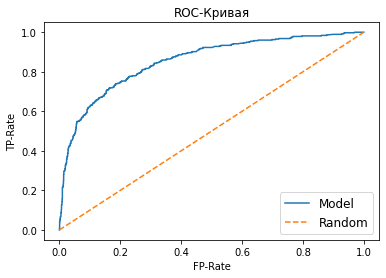

Auc-roc метрика равна: 0.8531753847626445
f-1 метрика равна: 0.615819209039548


In [ ]:
# Инициализация модели для проверки:
model = joblib.load('model.joblib')
# Обучение модели
model.fit(feat_train_up, target_train_up)
# Предсказание:
predictions_valid = model.predict(features_valid)
# Вывод качества для сравнения:
cchoosee(model, features_valid, target_valid, predictions_valid)

## Уменьшение выборки:
Тут будет всё тоже самое только вместо увелечения ответов иx уменьшение:

In [ ]:
# Создание функции для уменьшения выборки:
def down_sample(features, target, fraction):
    # Разделение данных на положительные и негативные:
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # Умеьшение кол-ва негативных данных:
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    # "Трясём" данные для лучшего обучения:
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled
print("Доля ответов которых нужно оставить:", 1/3.9)

Доля ответов которых нужно оставить: 0.25641025641025644


In [ ]:
# Создание Уменьшённой тренировачной выборки:
feat_train_down, target_train_down = down_sample(features_train, target_train, fraction=0.25641025641025644)

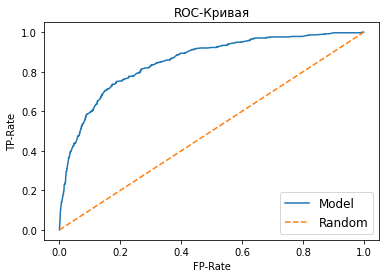

Auc-roc метрика равна: 0.8522347618162307
f-1 метрика равна: 0.5807730426164519


In [ ]:
model = joblib.load('model.joblib')
# Обучение модели
model.fit(feat_train_down, target_train_down)
# Предсказание:
predictions_valid = model.predict(features_valid)
# Вывод качества для сравнения:
cchoosee(model, features_valid, target_valid, predictions_valid)

## Изменение порога классификации:

In [ ]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
best_threshold = 0
best_f1 = 0
for threshold in np.arange(0.2, 0.8, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)

    print('Порог:', threshold, 'f-1:', f1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
print("Лучшее значение f1:", best_f1, "Достигается при пороге:", best_threshold)

Порог: 0.2 f-1: 0.4273204903677759
Порог: 0.22 f-1: 0.44174757281553406
Порог: 0.24 f-1: 0.4514501891551072
Порог: 0.26 f-1: 0.4637491835401698
Порог: 0.27999999999999997 f-1: 0.46956521739130436
Порог: 0.29999999999999993 f-1: 0.4793388429752066
Порог: 0.31999999999999995 f-1: 0.4908062234794908
Порог: 0.33999999999999997 f-1: 0.5058651026392962
Порог: 0.35999999999999993 f-1: 0.5152439024390244
Порог: 0.3799999999999999 f-1: 0.525984251968504
Порог: 0.3999999999999999 f-1: 0.530179445350734
Порог: 0.41999999999999993 f-1: 0.5446808510638297
Порог: 0.4399999999999999 f-1: 0.5550660792951542
Порог: 0.4599999999999999 f-1: 0.562329390354868
Порог: 0.47999999999999987 f-1: 0.5700667302192564
Порог: 0.49999999999999983 f-1: 0.579624134520277
Порог: 0.5199999999999998 f-1: 0.5917525773195876
Порог: 0.5399999999999998 f-1: 0.6086021505376344
Порог: 0.5599999999999998 f-1: 0.6126526082130965
Порог: 0.5799999999999998 f-1: 0.6137931034482758
Порог: 0.5999999999999999 f-1: 0.6148325358851674
П

### Вывод:
Лучшее улучшение Достигается за счёт увелечения выборки, f1-метрика выросла до 0.615, что на 0,0315 больше чем без улучшения. Дальше идёт изменения порога классификации, чуть-чуть отстает от увелечения: f1-метрика выросла до 0.6148. Хуже всех показало себя уменьшение выборки.

Остановимся на увелечении выборки: будем обучать модели на увеличенной выборке.

# Финальное тестирование:

## Дерево решений:

In [ ]:
# Обьявление модели:
model = DecisionTreeClassifier(random_state=12345, max_depth = 6)
# Обучение данной модели на увеличенной выборке:
model.fit(feat_train_up, target_train_up)
# Предсказание:
predictions_test = model.predict(features_test)
# Вывод качества модели:
print('f-1            :', f1_score(target_test, predictions_test))
print('Precision      :', precision_score(target_test, predictions_test))
print('Recall         :', recall_score(target_test, predictions_test))
print('Accuracy       :', accuracy_score(target_test, predictions_test))
print('Матрица ошибок:')
print(confusion_matrix(target_test, predictions_test))

f-1            : 0.537864077669903
Precision      : 0.40795287187039764
Recall         : 0.7891737891737892
Accuracy       : 0.7383177570093458
Матрица ошибок:
[[1066  402]
 [  74  277]]


## Random Forest:

In [ ]:
# Обьявление модели:
model = joblib.load('model.joblib')
# Обучение данной модели на увеличенной выборке:
model.fit(feat_train_up, target_train_up)
# Предсказание модели:
predictions_test = model.predict(features_test)
# Вывод качества модели:
print('f-1            :', f1_score(target_test, predictions_test))
print('Precision      :', precision_score(target_test, predictions_test))
print('Recall         :', recall_score(target_test, predictions_test))
print('Accuracy       :', accuracy_score(target_test, predictions_test))
print('Матрица ошибок:')
print(confusion_matrix(target_test, predictions_test))

f-1            : 0.592485549132948
Precision      : 0.6011730205278593
Recall         : 0.584045584045584
Accuracy       : 0.8449697636063771
Матрица ошибок:
[[1332  136]
 [ 146  205]]


## Логическая регрессия:

In [ ]:
# Обьявление модели:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
# Обучение данной модели на увеличенной выборке:
model.fit(feat_train_up, target_train_up)
# Предсказание модели:
predictions_test = model.predict(features_test)
# Вывод качества модели:
print('f-1            :', f1_score(target_test, predictions_test))
print('Precision      :', precision_score(target_test, predictions_test))
print('Recall         :', recall_score(target_test, predictions_test))
print('Accuracy       :', accuracy_score(target_test, predictions_test))
print('Матрица ошибок:')
print(confusion_matrix(target_test, predictions_test))

f-1            : 0.4975320829220138
Precision      : 0.3806646525679758
Recall         : 0.717948717948718
Accuracy       : 0.720175920835624
Матрица ошибок:
[[1058  410]
 [  99  252]]


### Вывод:
Как и до улучшения: Лучше всех себя показа модель Random Forest, но на тестовой выборке она значительно лучше остальных моделей. Мы достигли значения f-1 метрики чуть больше 0.59

# Вывод:
## Лучшая модель - Random Forest с кол-вом деревьев 39, макс глубина 15.

## В данном проекте были предприняты следующие шаги:

### 1.) Полученна и анализирована общая информация о данных.

### 2.) Данные разделены на 3 выборки: обучающую, валидационную и тестовую.

### 3.) Проведенно исследование 3х моделий обучений, выяснено какая из них лучше. ( без учёта баланса классов)

### 4.) Исследован баланс классов. Улучшена обучающая выборка.

### 5.) Модели переобучили с улучшенной обучающей выборки.

### 6.) Качество моделей проверено с помощью тестовой выборки, Достигнута f-1 метрика в 0.59 .